In [1]:
#importation des librairies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords
import nltk
import string
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#from wordcloud import WordCloud, STOPWORDS

In [2]:
#Lecture de du dataset et dans ce tp nous allons utiliser celui de l'analyse des sentiments 
dataset = pd.read_csv("data.csv",encoding= "ISO-8859-1")
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [3]:
#Reponse à la question numéro1 du TP
dataset['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

# #PRETRAITEMENT ET SUITE DES REPONSES AUX QUESTIONS POSEES

In [4]:
#Convertir tout ce qui n'est pas a-z, A-Z, 0-9 en espace et supprimer le lien des tweets
#Cette pratique est relative à la question numéro 2 du TP 
dataset['clean_tweet'] = dataset['OriginalTweet'].apply(lambda x: re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", x))
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COV...
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,Airline pilots offering to stock supermarket s...
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,Response to complaint not provided citing COVI...
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,You know it s getting tough when KameronWild...
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,Is it wrong that the smell of hand sanitizer i...


In [5]:
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COV...


In [6]:
selected =  dataset.loc[:, ["OriginalTweet", "clean_tweet"]]
selected

,OriginalTweet,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,MeNyrbie Phil Gahan Chrisitv and and
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Me ready to go at supermarket during the COV...
...,...,...
41152,Airline pilots offering to stock supermarket s...,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Response to complaint not provided citing COVI...
41154,You know itÂs getting tough when @KameronWild...,You know it s getting tough when KameronWild...
41155,Is it wrong that the smell of hand sanitizer i...,Is it wrong that the smell of hand sanitizer i...


<AxesSubplot:>

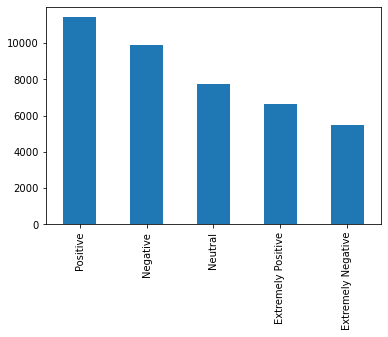

In [7]:
dataset.Sentiment.value_counts().plot(kind='bar')

In [8]:
!pip install wordcloud

In [9]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [10]:
!pip install nltk
!python -m nltk.downloader stopwords

C:\ProgramData\Anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to C:\Users\Preferé
[nltk_data]     Briges\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
!pip install spacy
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [12]:
dataset['clean_tweet'].isnull().sum()

0

In [2]:
dataset['document_length'] = dataset['clean_tweet'].apply(lambda tokens: len(tokens))
datset

NameError: name 'dataset' is not defined

In [14]:
dataset['document_length'].head()

0     45
1    237
2    109
3    284
4    288
Name: document_length, dtype: int64

In [15]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [17]:
import nltk 
import nltk.corpus
import numpy as np
from nltk.text import Text

freq = nltk.FreqDist(np.hstack(dataset['clean_tweet']))
freq

FreqDist({'Country star Brad Paisley and his wife  Kimberly  are helping the elderly in their community during the coronavirus outbreak    ': 2, 'Me at the grocery store     coronavirus  ': 2, ' Saudi Arabia is bracing for an economic downturn as oil prices plummet due to the  coronavirus pandemic   ': 2, 'GRAPHIC How COVID 19 affected U S  consumer prices in March  ': 2, ' MeNyrbie  Phil Gahan  Chrisitv   and   and  ': 1, 'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order': 1, 'Coronavirus Australia  Woolworths to give elderly  disabled dedicated shopping hours amid COVID 19 outbreak  ': 1, 'My food stock is not the only one which is empty         PLEASE  don t panic  THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need     Stay calm  stay safe        COVID19france  COVID 19  

In [18]:
print(dataset.shape)

(41157, 8)


In [19]:
dataset['clean_tweet'] = dataset['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweet,document_length
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv and and,45
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk your neighbours family exchange ph...,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly ...,109
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the only one which empty PLEASE...,284
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket during the COVID19 outbreak ...,288
...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,Airline pilots offering stock supermarket shel...,80
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,Response complaint not provided citing COVID r...,138
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,You know getting tough when KameronWilds ratio...,136
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,wrong that the smell hand sanitizer starting t...,111


In [20]:
dataset.head(6)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweet,document_length
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv and and,45
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk your neighbours family exchange ph...,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly ...,109
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the only one which empty PLEASE...,284
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket during the COVID19 outbreak ...,288
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,news the region first confirmed COVID case cam...,228


In [21]:
#Suppression de @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [22]:
# Enlevons les mots courts
dataset['clean_tweet'] = dataset['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweet,document_length
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv and and,45
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk your neighbours family exchange ph...,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly ...,109
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the only one which empty PLEASE...,284
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket during the COVID19 outbreak ...,288
...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,Airline pilots offering stock supermarket shel...,80
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,Response complaint not provided citing COVID r...,138
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,You know getting tough when KameronWilds ratio...,136
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,wrong that the smell hand sanitizer starting t...,111


In [23]:
#Tokenisation
# créer la nouvelle variable des tweet tokenisés
tokenized_tweet = dataset['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet

0              [MeNyrbie, Phil, Gahan, Chrisitv, and, and]
1        [advice, Talk, your, neighbours, family, excha...
2        [Coronavirus, Australia, Woolworths, give, eld...
3        [food, stock, not, the, only, one, which, empt...
4        [ready, supermarket, during, the, COVID19, out...
                               ...                        
41152    [Airline, pilots, offering, stock, supermarket...
41153    [Response, complaint, not, provided, citing, C...
41154    [You, know, getting, tough, when, KameronWilds...
41155    [wrong, that, the, smell, hand, sanitizer, sta...
41156    [TartiiCat, Well, new, used, Rift, are, going,...
Name: clean_tweet, Length: 41157, dtype: object

In [24]:
#stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

# Appliquer le stemmer pour tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

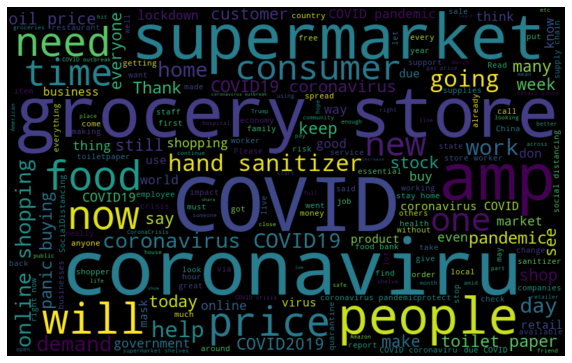

In [25]:
# créer un texte à partir de tous les tweets
all_words = ' '.join([text for text in dataset['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [26]:
#Extraire les caractéristiques des tweets nettoyés
new_dataset = dataset[['clean_tweet','Sentiment']]
new_dataset

,clean_tweet,Sentiment
0,MeNyrbie Phil Gahan Chrisitv and and,Neutral
1,advice Talk your neighbours family exchange ph...,Positive
2,Coronavirus Australia Woolworths give elderly ...,Positive
3,food stock not the only one which empty PLEASE...,Positive
4,ready supermarket during the COVID19 outbreak ...,Extremely Negative
...,...,...
41152,Airline pilots offering stock supermarket shel...,Neutral
41153,Response complaint not provided citing COVID r...,Extremely Negative
41154,You know getting tough when KameronWilds ratio...,Positive
41155,wrong that the smell hand sanitizer starting t...,Neutral


In [27]:
dataset['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [28]:
#Retrait des stopword
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Preferé
[nltk_data]     Briges\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
new_dataset['clean_tweet'].apply(lambda x: [item for item in x if item not in stop])

0        [M, e, N, r, b, e,  , P, h, l,  , G, h, n,  , ...
1        [v, c, e,  , T, l, k,  , u, r,  , n, e, g, h, ...
2        [C, r, n, v, r, u,  , A, u, r, l,  , W, l, w, ...
3        [f,  , c, k,  , n,  , h, e,  , n, l,  , n, e, ...
4        [r, e,  , u, p, e, r, r, k, e,  , u, r, n, g, ...
                               ...                        
41152    [A, r, l, n, e,  , p, l,  , f, f, e, r, n, g, ...
41153    [R, e, p, n, e,  , c, p, l, n,  , n,  , p, r, ...
41154    [Y, u,  , k, n, w,  , g, e, n, g,  , u, g, h, ...
41155    [w, r, n, g,  , h,  , h, e,  , e, l, l,  , h, ...
41156    [T, r, C,  , W, e, l, l,  , n, e, w,  , u, e, ...
Name: clean_tweet, Length: 41157, dtype: object

In [31]:
new_dataset.head(6)

,clean_tweet,Sentiment
0,MeNyrbie Phil Gahan Chrisitv and and,Neutral
1,advice Talk your neighbours family exchange ph...,Positive
2,Coronavirus Australia Woolworths give elderly ...,Positive
3,food stock not the only one which empty PLEASE...,Positive
4,ready supermarket during the COVID19 outbreak ...,Extremely Negative
5,news the region first confirmed COVID case cam...,Positive


In [32]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_dataset,test_size = 0.3,random_state=0,stratify = new_dataset.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("test shape : ", valid.shape)

train shape :  (28809, 2)
test shape :  (12348, 2)


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.clean_tweet.values)
X_test = vectorizer.transform(valid.clean_tweet.values)

y_train = train.Sentiment.values
y_test = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (28809, 43820)
X_test.shape :  (12348, 43820)
y_train.shape :  (28809,)
y_test.shape :  (12348,)


In [38]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.7638238050609185
Validation accuracy Score :  0.4722222222222222
                    precision    recall  f1-score   support

Extremely Negative       0.32      0.59      0.42       903
Extremely Positive       0.38      0.59      0.46      1286
          Negative       0.53      0.43      0.48      3643
           Neutral       0.32      0.69      0.44      1076
          Positive       0.65      0.41      0.50      5440

          accuracy                           0.47     12348
         macro avg       0.44      0.54      0.46     12348
      weighted avg       0.53      0.47      0.48     12348



In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Test accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy Score    :  0.9638654587108195
Test accuracy Score :  0.6073858114674441
                    precision    recall  f1-score   support

Extremely Negative       0.58      0.67      0.62      1445
Extremely Positive       0.60      0.70      0.64      1702
          Negative       0.54      0.56      0.55      2910
           Neutral       0.73      0.63      0.68      2663
          Positive       0.60      0.56      0.58      3628

          accuracy                           0.61     12348
         macro avg       0.61      0.62      0.61     12348
      weighted avg       0.61      0.61      0.61     12348



In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Test accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9998611545003298
Test accuracy Score :  0.5600907029478458
                    precision    recall  f1-score   support

Extremely Negative       0.36      0.70      0.47       834
Extremely Positive       0.33      0.72      0.45       912
          Negative       0.53      0.51      0.52      3055
           Neutral       0.82      0.60      0.70      3128
          Positive       0.64      0.50      0.56      4419

          accuracy                           0.56     12348
         macro avg       0.54      0.61      0.54     12348
      weighted avg       0.62      0.56      0.57     12348



In [52]:
models = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 
              'Random Forest'],
    'Test accuracy': [NB_accuracy, logreg_accuracy, 
              rf_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,Logistic Regression,0.607386
2,Random Forest,0.560091
0,Naive Bayes,0.472222


#### Le meilleur modele  
Cette partie est la reponse à la question 5 nous avons constaté que parmi les trois algorithmes utilisés; la regression logistique a la meilleure Précision; soit 61%


In [42]:
#Classe à Prédire
CLASSES_LIST = np.unique(dataset['Sentiment'])
n_out = len(CLASSES_LIST)

print(CLASSES_LIST, n_out)

['Extremely Negative' 'Extremely Positive' 'Negative' 'Neutral' 'Positive'] 5


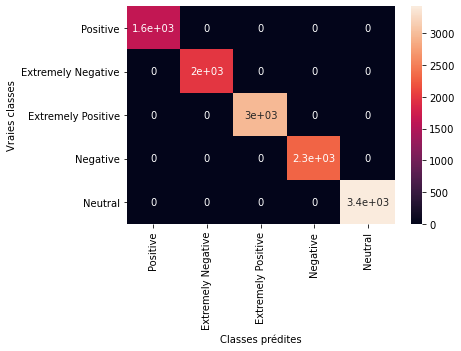

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_test), annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.ylabel('Vraies classes')
plt.xlabel('Classes prédites')
plt.show()